#DATA & ANALYTICS

----------------------------
PROYECTO N°04

In [1]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

CARGAMOS LA DATA

In [2]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Siniestros.csv to Siniestros.csv


{'Siniestros.csv': b'Cliente_ID,Antig\xfcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1454,122,1,83

In [3]:
#levantamos la data con pandas
data_siniestros = pd.read_csv('Siniestros.csv',encoding= 'unicode_escape')
data_siniestros.head(100)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12416,8.0,0.0,545.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
96,12424,22.0,1.0,13115.89,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
97,12911,26.0,1.0,9369.31,0,0.0,0.0,0.0,1.0,1.0,0.0,2,0,0,0,2,3,no
98,13142,63.0,1.0,5064.26,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [4]:
data_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

Dado que nuestra variable target es Estado_Siniestro, nos quedamos con las filas en las que tengamos información de dicha variable

In [5]:
data_siniestros = data_siniestros.dropna(subset=['Estado_Siniestro'])
data_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           4732 non-null   int64  
 1   Antigüedad_Maxima    4250 non-null   float64
 2   Nivel_Ingresos       4501 non-null   float64
 3   Saldo_Pendiente      4732 non-null   float64
 4   Puntaje_Morosidad1   4732 non-null   int64  
 5   Puntaje_Morosidad2   4732 non-null   float64
 6   Puntaje_Morosidad3   4731 non-null   float64
 7   Puntaje_Morosidad4   4729 non-null   float64
 8   Puntaje_Morosidad5   4728 non-null   float64
 9   Puntaje_Morosidad6   4728 non-null   float64
 10  Saldo_Pendiente_Seg  4732 non-null   float64
 11  Siniestros1          4732 non-null   int64  
 12  Siniestros2          4732 non-null   int64  
 13  Siniestros3          4732 non-null   int64  
 14  Siniestros4          4732 non-null   int64  
 15  Siniestros5          4732 non-null   i

Seleccionamos la data categórica

In [6]:
#obtenemos las columnas categóricas
data_siniestros_cat = data_siniestros.select_dtypes(['object'])
data_siniestros_cat

,Estado_Siniestro
0,no
1,no
2,no
3,no
4,no
...,...
4727,no
4728,no
4729,si
4730,si


Transformamos la data categórica en numérica

In [7]:
data_siniestros_cat2num=pd.get_dummies(data_siniestros_cat, drop_first=True)
data_siniestros_cat2num

,Estado_Siniestro_si
0,0
1,0
2,0
3,0
4,0
...,...
4727,0
4728,0
4729,1
4730,1


Obtenemos la data numérica

In [8]:
data_siniestros_num = data_siniestros.select_dtypes(exclude=['object'])
data_siniestros_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           4732 non-null   int64  
 1   Antigüedad_Maxima    4250 non-null   float64
 2   Nivel_Ingresos       4501 non-null   float64
 3   Saldo_Pendiente      4732 non-null   float64
 4   Puntaje_Morosidad1   4732 non-null   int64  
 5   Puntaje_Morosidad2   4732 non-null   float64
 6   Puntaje_Morosidad3   4731 non-null   float64
 7   Puntaje_Morosidad4   4729 non-null   float64
 8   Puntaje_Morosidad5   4728 non-null   float64
 9   Puntaje_Morosidad6   4728 non-null   float64
 10  Saldo_Pendiente_Seg  4732 non-null   float64
 11  Siniestros1          4732 non-null   int64  
 12  Siniestros2          4732 non-null   int64  
 13  Siniestros3          4732 non-null   int64  
 14  Siniestros4          4732 non-null   int64  
 15  Siniestros5          4732 non-null   i

Unimos la data numérica y la categórica transformada, además eliminamos el cliente_ID dado que no aporta información

In [9]:
data_siniestros_num=pd.concat([data_siniestros_num, data_siniestros_cat2num], axis=1)
data_siniestros_num.drop("Cliente_ID", inplace=True, axis=1)
data_siniestros_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    4250 non-null   float64
 1   Nivel_Ingresos       4501 non-null   float64
 2   Saldo_Pendiente      4732 non-null   float64
 3   Puntaje_Morosidad1   4732 non-null   int64  
 4   Puntaje_Morosidad2   4732 non-null   float64
 5   Puntaje_Morosidad3   4731 non-null   float64
 6   Puntaje_Morosidad4   4729 non-null   float64
 7   Puntaje_Morosidad5   4728 non-null   float64
 8   Puntaje_Morosidad6   4728 non-null   float64
 9   Saldo_Pendiente_Seg  4732 non-null   float64
 10  Siniestros1          4732 non-null   int64  
 11  Siniestros2          4732 non-null   int64  
 12  Siniestros3          4732 non-null   int64  
 13  Siniestros4          4732 non-null   int64  
 14  Siniestros5          4732 non-null   int64  
 15  Siniestros6          4732 non-null   i

Imputación en data numérica

In [10]:
# Reemplazando con la median de cada columna: Variables Cuantitativas

data_siniestros_num = data_siniestros_num.apply(lambda x: x.fillna(x.median()), axis = 0)

data_siniestros_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    4732 non-null   float64
 1   Nivel_Ingresos       4732 non-null   float64
 2   Saldo_Pendiente      4732 non-null   float64
 3   Puntaje_Morosidad1   4732 non-null   int64  
 4   Puntaje_Morosidad2   4732 non-null   float64
 5   Puntaje_Morosidad3   4732 non-null   float64
 6   Puntaje_Morosidad4   4732 non-null   float64
 7   Puntaje_Morosidad5   4732 non-null   float64
 8   Puntaje_Morosidad6   4732 non-null   float64
 9   Saldo_Pendiente_Seg  4732 non-null   float64
 10  Siniestros1          4732 non-null   int64  
 11  Siniestros2          4732 non-null   int64  
 12  Siniestros3          4732 non-null   int64  
 13  Siniestros4          4732 non-null   int64  
 14  Siniestros5          4732 non-null   int64  
 15  Siniestros6          4732 non-null   i

In [11]:
data_siniestros_num.rename(columns={'Estado_Siniestro_si': 'Estado_Siniestro'}, inplace=True)
columns_num = data_siniestros_num.columns  # columnas numérica solamente
data_siniestros_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Antigüedad_Maxima,4732.0,53.56,45.16,6.00,18.00,41.00,76.00,255.00
Nivel_Ingresos,4732.0,1.15,1.17,0.00,0.00,1.00,1.00,5.00
Saldo_Pendiente,4732.0,3660.04,6559.26,0.01,465.09,1299.42,3910.11,124102.08
Puntaje_Morosidad1,4732.0,0.17,0.55,0.00,0.00,0.00,0.00,3.00
Puntaje_Morosidad2,4732.0,0.19,0.75,0.00,0.00,0.00,0.00,7.00
Puntaje_Morosidad3,4732.0,0.18,0.71,0.00,0.00,0.00,0.00,7.00
Puntaje_Morosidad4,4732.0,0.16,0.67,0.00,0.00,0.00,0.00,7.00
Puntaje_Morosidad5,4732.0,0.15,0.64,0.00,0.00,0.00,0.00,7.00
Puntaje_Morosidad6,4732.0,0.14,0.62,0.00,0.00,0.00,0.00,7.00
Saldo_Pendiente_Seg,4732.0,5548.86,23290.85,0.00,0.00,0.00,0.00,442334.80


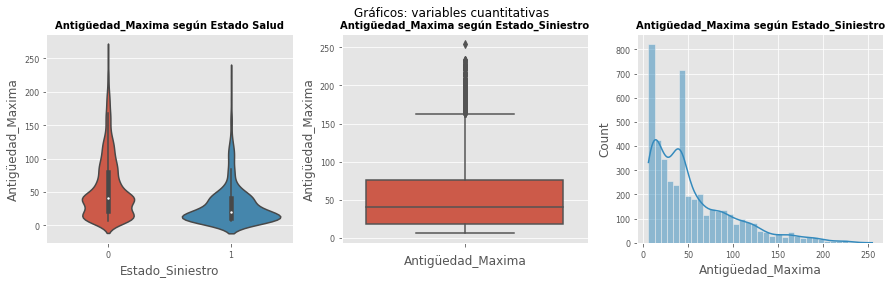

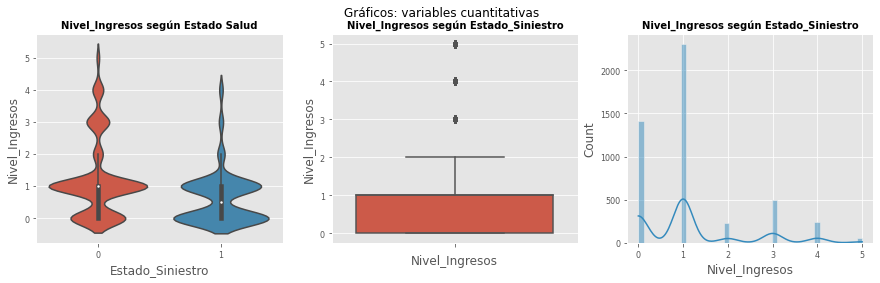

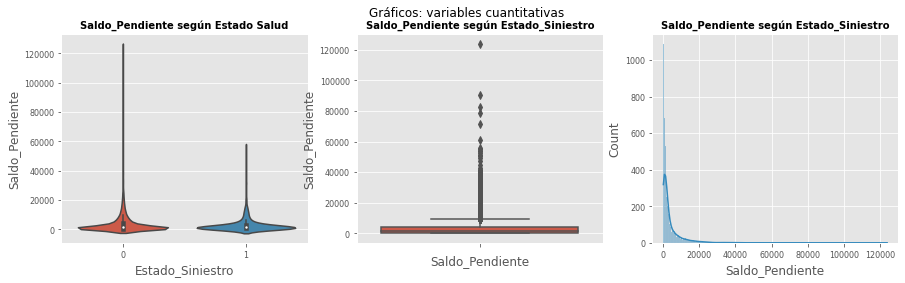

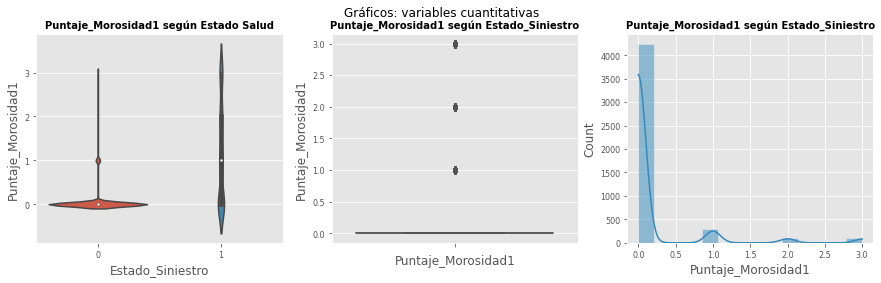

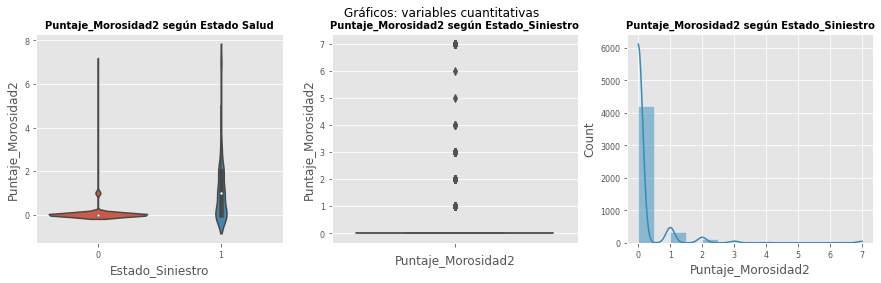

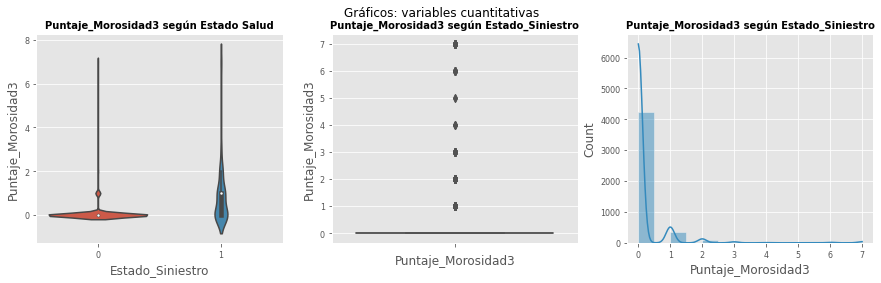

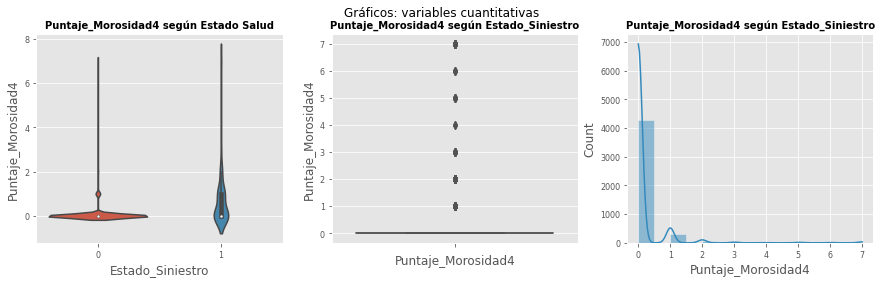

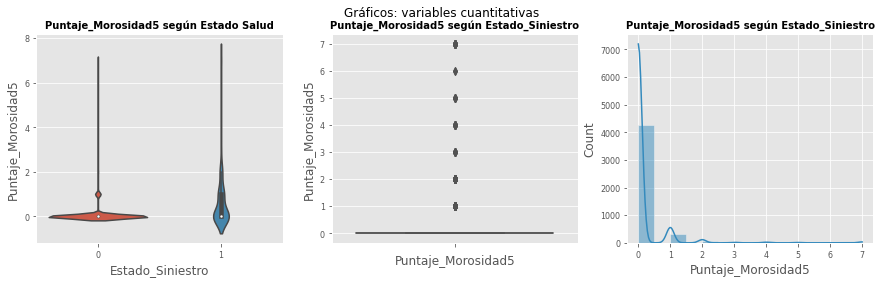

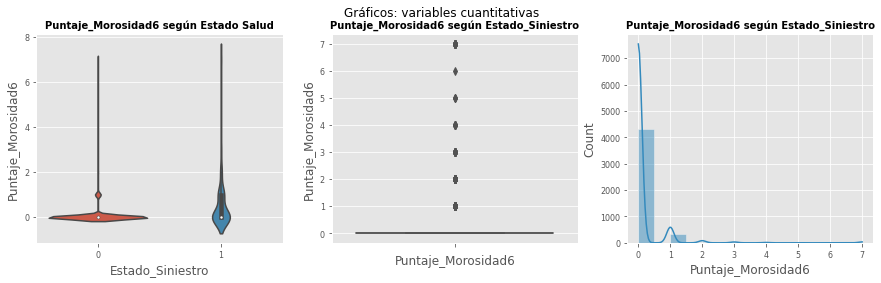

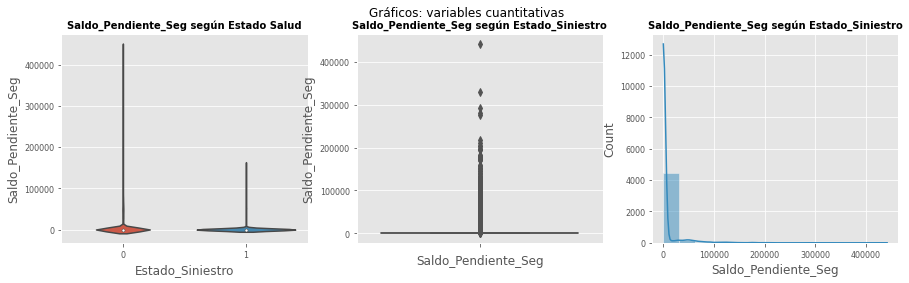

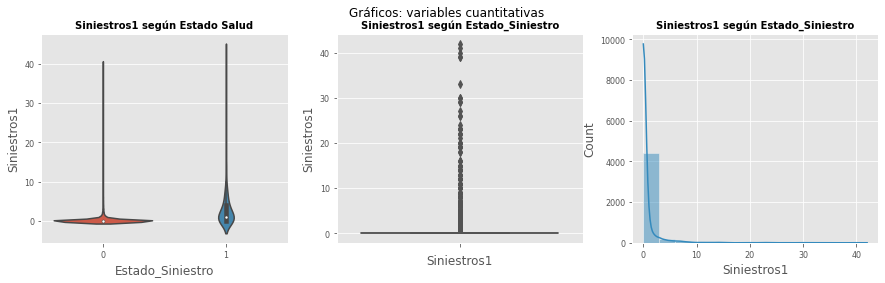

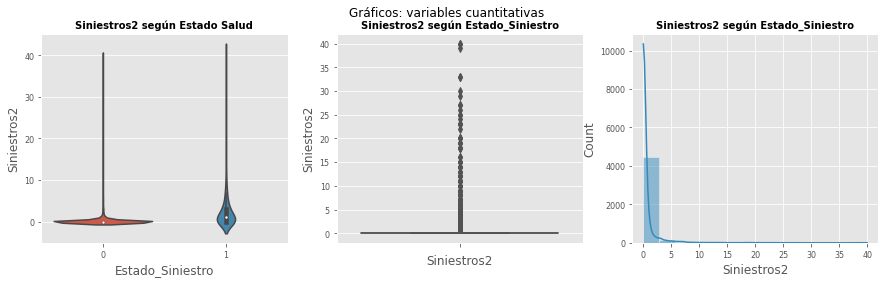

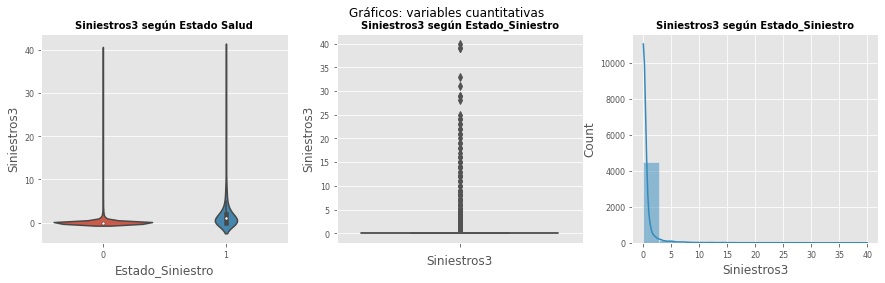

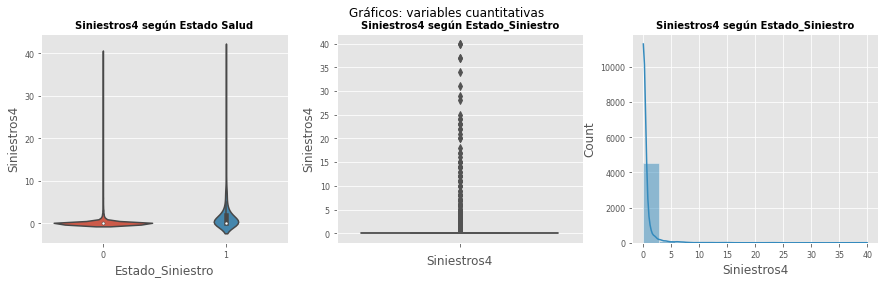

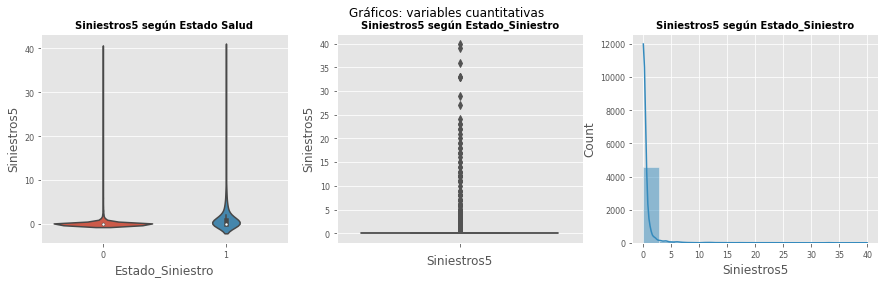

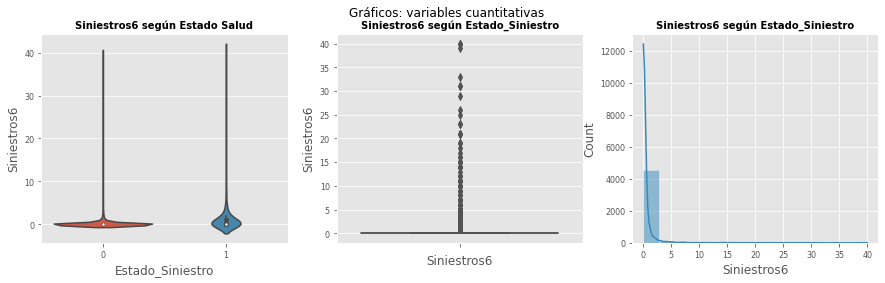

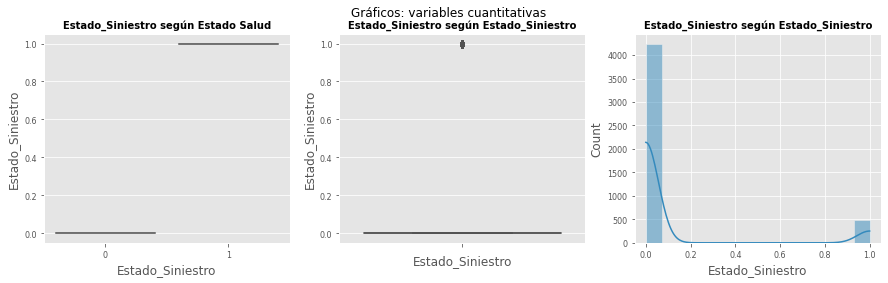

In [12]:
for i, colum in enumerate(columns_num): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')
    
    sns.violinplot(x = 'Estado_Siniestro', y = colum,  data  = data_siniestros_num, ax=ax[0])
    ax[0].set_title(str(colum) + " según Estado Salud", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('Estado_Siniestro')

    sns.boxplot(y = colum,  data  = data_siniestros_num, ax=ax[1])
    ax[1].set_title(str(colum) + " según Estado_Siniestro", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=data_siniestros_num, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Estado_Siniestro", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

In [13]:
# identificamos outliers: Saldo_Pendiente

pc_out = data_siniestros_num.Saldo_Pendiente.quantile(0.99)
print(pc_out)

data_siniestros_num.Saldo_Pendiente[data_siniestros_num.Saldo_Pendiente > pc_out]


30704.219299999935


142      34215.19
515      36242.97
558      39440.96
826      32835.84
844      49435.69
862      40162.46
871      40810.28
931      35272.21
960      41643.16
1000     51229.44
1228     31601.53
1280     33843.63
1282     37267.81
1388     30753.50
1398     38398.55
1639     34348.56
1753     55375.76
1867     37299.52
2062     47230.82
2129     31451.46
2312     33758.16
2328     42773.55
2372     50598.89
2792     52795.81
2815     33492.80
2828     41597.51
2907     44905.40
3132     33461.54
3258     35778.28
3523     38994.60
3567     54048.74
3635     78751.32
3681     31661.23
3896     53656.86
3920    124102.08
3929     82344.86
3960     55487.02
4000     32850.57
4194     71221.61
4309     38966.95
4362     32330.01
4385     90478.23
4403     38632.33
4444     31097.56
4479     61055.41
4600     38158.90
4638     37689.40
4639     31407.82
Name: Saldo_Pendiente, dtype: float64

In [14]:
# identificamos outliers: Siniestros1

pc_out = data_siniestros_num.Siniestros1.quantile(0.99)
print(pc_out)

data_siniestros_num.Siniestros1[data_siniestros_num.Siniestros1 > pc_out]


13.0


211     19
247     33
335     16
348     22
354     30
357     20
405     20
492     23
632     18
873     40
903     19
964     23
1020    22
1358    15
1495    24
1758    23
1832    23
1958    39
1988    30
2013    16
2073    26
2257    20
2505    14
2611    14
2648    19
2983    15
3031    39
3059    26
3090    14
3299    14
3319    15
3419    29
3423    14
3553    27
3705    16
3769    19
3814    18
3824    42
3837    41
3950    15
3968    14
4171    22
4389    29
4606    14
4650    21
Name: Siniestros1, dtype: int64

In [15]:
data_siniestros_num.Siniestros1.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    2
98    0
99    0
Name: Siniestros1, Length: 100, dtype: int64

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

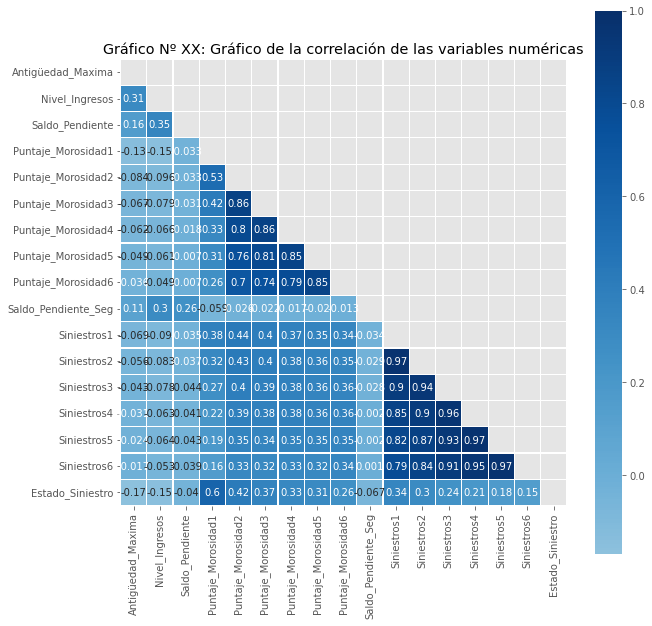

In [16]:
correlacion = data_siniestros_num.corr().round(3)

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")



## Entrenamiento

In [17]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_siniestros_num)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_  # matriz i * j

array([[-3.56424362e-02, -4.78954361e-02, -2.21445271e-02,
         1.71780512e-01,  2.71321678e-01,  2.68630397e-01,
         2.63634502e-01,  2.57344705e-01,  2.47880844e-01,
        -1.59504886e-02,  3.15860297e-01,  3.22122654e-01,
         3.23149299e-01,  3.19955574e-01,  3.11184568e-01,
         3.00779098e-01,  1.59995393e-01],
       [ 5.79469923e-02,  4.58978606e-02,  7.84994545e-03,
        -1.78786641e-01, -3.19332080e-01, -3.36974662e-01,
        -3.32618339e-01, -3.32831986e-01, -3.03239747e-01,
         2.82629159e-02,  2.11771602e-01,  2.36203386e-01,
         2.60635922e-01,  2.68938546e-01,  2.82391471e-01,
         2.89533062e-01, -1.68364210e-01],
       [ 4.05112903e-01,  5.48889925e-01,  4.60285271e-01,
        -1.98478080e-01,  2.80937141e-02,  7.20793519e-02,
         1.06085792e-01,  1.19563257e-01,  1.32909425e-01,
         4.25148856e-01, -4.36541615e-02, -2.20077897e-02,
        -1.11238540e-03,  2.66331335e-02,  3.04496181e-02,
         3.78972052e-02, -2.1

In [18]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data_siniestros_num.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
)

componentes = componentes.transpose().round(3)
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Antigüedad_Maxima,-0.036,0.058,0.405,0.067,-0.779,0.287,0.364,0.069,0.026,-0.008,0.005,0.002,-0.006,0.001,0.001,-0.002,-0.000
Nivel_Ingresos,-0.048,0.046,0.549,-0.159,-0.117,-0.038,-0.808,-0.025,-0.033,0.009,0.004,-0.004,0.000,-0.001,0.000,0.001,-0.005
Saldo_Pendiente,-0.022,0.008,0.460,-0.336,0.135,-0.706,0.394,-0.011,0.018,0.037,-0.010,0.006,0.005,-0.002,0.002,-0.000,-0.000
Puntaje_Morosidad1,0.172,-0.179,-0.198,-0.564,-0.189,0.098,0.015,-0.500,-0.485,0.022,0.210,0.064,0.025,-0.008,-0.001,0.031,0.004
Puntaje_Morosidad2,0.271,-0.319,0.028,-0.039,-0.033,0.042,-0.006,-0.295,0.276,0.233,-0.571,-0.304,-0.422,-0.066,-0.016,-0.012,-0.007
Puntaje_Morosidad3,0.269,-0.337,0.072,0.077,-0.000,0.022,-0.010,-0.165,0.338,0.208,-0.034,0.232,0.749,0.050,0.014,-0.002,0.010
Puntaje_Morosidad4,0.264,-0.333,0.106,0.165,0.040,-0.016,-0.007,0.034,0.201,0.110,0.565,0.398,-0.488,0.085,-0.006,0.007,-0.046
Puntaje_Morosidad5,0.257,-0.333,0.120,0.194,0.041,-0.039,0.011,0.152,-0.192,-0.182,0.339,-0.733,0.141,-0.017,-0.042,-0.012,0.037
Puntaje_Morosidad6,0.248,-0.303,0.133,0.229,0.051,-0.042,0.014,0.216,-0.521,-0.354,-0.424,0.381,-0.015,-0.038,0.033,0.009,0.000
Saldo_Pendiente_Seg,-0.016,0.028,0.425,-0.257,0.545,0.631,0.232,0.021,0.010,-0.040,0.007,-0.001,0.001,-0.007,-0.010,-0.003,-0.004


### Influencia de las variables en cada componetes

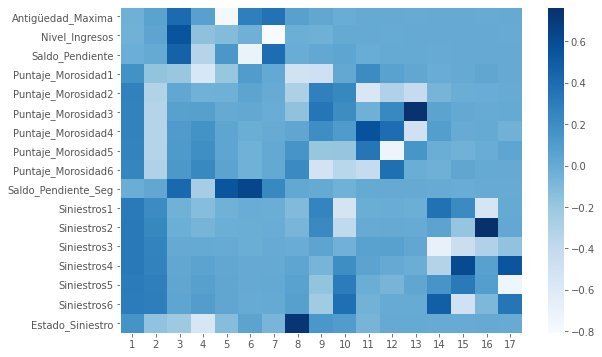

In [19]:
# Heatmap de los 16 componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto')   # cmap= "viridis" "#69d" 
plt.yticks(range(len(data_siniestros_num.columns)), data_siniestros_num.columns)
plt.xticks(range(len(data_siniestros_num.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Varianza explicada de cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.43053468 0.16936431 0.10668569 0.07282881 0.05209862 0.04286098
 0.03478704 0.02569652 0.01773993 0.01566283 0.00979592 0.0076456
 0.00657152 0.00336457 0.00201538 0.0012946  0.001053  ]


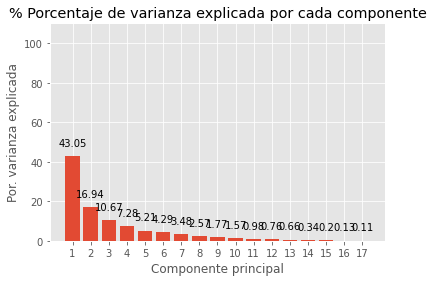

In [20]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_*100
)

for x, y in zip(np.arange(len(data_siniestros_num.columns)) + 1, modelo_pca.explained_variance_ratio_*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1*100)
ax.set_title('% Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.43053468 0.59989899 0.70658468 0.77941349 0.83151211 0.87437309
 0.90916013 0.93485665 0.95259658 0.96825941 0.97805533 0.98570093
 0.99227245 0.99563702 0.9976524  0.998947   1.        ]


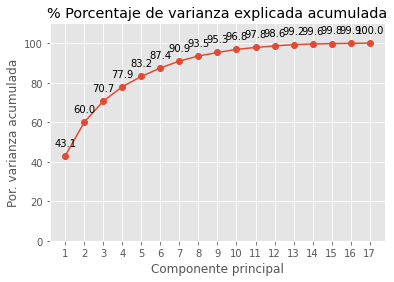

In [21]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_siniestros_num.columns)) + 1,
    prop_varianza_acum*100,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_siniestros_num.columns)) + 1, prop_varianza_acum*100):
    label = round(y, 1)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1*100)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

# ANALISIS CLUSTER

In [22]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

In [23]:
# Estandarización de las variables
# ==============================================================================
datos_scaled = scale(X=data_siniestros_num, axis=0, with_mean=True, with_std=True) 

datos_scaled = pd.DataFrame(datos_scaled, 
                            columns=data_siniestros_num.columns, 
                            index=data_siniestros_num.index)
datos_scaled.head(4)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,-0.211730,-0.130766,-0.465830,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.342186
1,0.563449,-0.130766,-0.404635,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.342186
2,1.072852,-0.130766,-0.512430,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.342186
3,-0.278174,-0.130766,-0.459681,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404,-0.342186


In [24]:
# Cálculo de distancias

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.777591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.285428,0.520684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.066728,0.843421,1.352056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.440826,0.675221,0.155530,1.507470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.079903,2.308389,1.794527,3.146502,1.639256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.993745,2.262220,1.836515,3.055852,1.711259,1.036194,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.765021,1.621234,1.715007,1.792948,1.773042,2.868203,2.848149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
11625516,3724,2456,0.000005
4195008,2456,886,0.000012
4196276,3724,886,0.000017
5379035,3483,1136,0.000027
581144,3840,122,0.000034
1662068,1136,351,0.000055
4206318,4302,888,0.000061
810041,869,171,0.000064
508327,2003,107,0.000064
4579568,3724,967,0.000076


### Número óptimo de Clústers

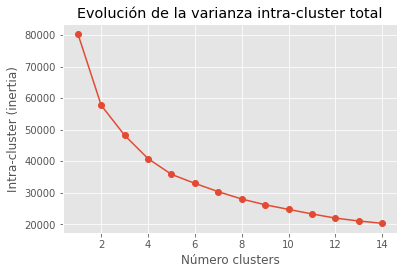

In [26]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Seleccionamos 5 clusters

## Entrenamiento

In [27]:
kmeans = KMeans(n_clusters=5).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)


[[-4.81515055e-01 -5.25856724e-01 -1.89476460e-01  2.57577731e+00
   1.49193127e+00  1.22452071e+00  9.70369498e-01  9.76178816e-01
   7.67458616e-01 -2.05388792e-01  1.24140509e+00  1.07994316e+00
   8.45639486e-01  6.94355234e-01  6.15376567e-01  5.02248576e-01
   2.48646128e+00]
 [ 7.38619803e-02 -4.22751941e-01 -3.50017539e-01  9.93712241e-01
   2.62915904e+00  2.51648539e+00  2.78663724e+00  2.57759786e+00
   2.53712704e+00  8.68631971e-03  7.86564874e+00  8.30531149e+00
   8.91655614e+00  9.05958830e+00  9.10677388e+00  8.96852423e+00
   7.74639923e-01]
 [-1.43911410e-01 -3.59306228e-01 -2.16217117e-01 -2.06533154e-01
  -1.87305189e-01 -1.73190963e-01 -1.57254995e-01 -1.57516401e-01
  -1.35780935e-01 -1.84959680e-01 -1.65346405e-01 -1.59115651e-01
  -1.47453372e-01 -1.37514159e-01 -1.28045161e-01 -1.18594152e-01
  -1.87813173e-01]
 [-1.50032417e-01 -2.52694270e-01 -2.03367230e-01  1.00056347e+00
   8.34774229e+00  9.10042241e+00  9.18518742e+00  8.90174698e+00
   8.55524921e+00 -

In [28]:
# cluster al que pertenece cada persona
cluster = kmeans.predict(datos_scaled)
cluster

array([2, 2, 2, ..., 2, 3, 0], dtype=int32)

## Clúster en DataFrame

In [29]:
# El cluster en nuestro DataFrame
data_siniestros_clus=data_siniestros_num.copy()

data_siniestros_clus['cluster'] = cluster
data_siniestros_clus['cluster'].replace({0: "Clúster 0",  # etiquetamos los grupos
                                   1: "Clúster 1",
                                   2: "Clúster 2",
                                   3: "Clúster 3",
                                   4: "Clúster 4"},
                                  inplace=True)
data_siniestros_clus.head()

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,cluster
0,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,Clúster 2
1,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,Clúster 2
2,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,Clúster 2
3,41.0,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,Clúster 2
4,109.0,1.0,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,Clúster 2


In [30]:
# Perfilando cada Estrato. Podemos añadir variables cualitativas para su mejor entendimiento.
#---------------------------------------------------------------------------------------------
data_siniestros_clus.groupby(['cluster'])[data_siniestros_clus.columns].mean().round(2).T

cluster,Clúster 0,Clúster 1,Clúster 2,Clúster 3,Clúster 4
Antigüedad_Maxima,31.82,56.89,47.06,46.79,87.33
Nivel_Ingresos,0.54,0.66,0.73,0.86,3.06
Saldo_Pendiente,2417.34,1364.42,2241.96,2326.24,9818.16
Puntaje_Morosidad1,1.58,0.71,0.05,0.71,0.03
Puntaje_Morosidad2,1.31,2.16,0.05,6.43,0.03
Puntaje_Morosidad3,1.05,1.97,0.05,6.68,0.04
Puntaje_Morosidad4,0.81,2.03,0.05,6.32,0.04
Puntaje_Morosidad5,0.78,1.82,0.05,5.89,0.06
Puntaje_Morosidad6,0.62,1.71,0.06,5.43,0.05
Saldo_Pendiente_Seg,765.69,5751.15,1241.45,388.44,24365.62


In [31]:
# Tabla de frecuencia del Cluster
cluster_count = (data_siniestros_clus
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
Clúster 0,337,337
Clúster 1,38,375
Clúster 2,3447,3822
Clúster 3,28,3850
Clúster 4,882,4732


## Graficando las variables numéricas input

In [32]:
import seaborn as sns

def graficar_nums(cluster, var_num, data):

  fig, ax = plt.subplots(figsize=(6, 3.84))

  sns.violinplot(
          x     = cluster,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )

  ax.set_title(f'{var_num} por Cluster');

In [33]:
#data_siniestros_num.drop("cluster", inplace=True, axis=1).columns
new_columns=data_siniestros_clus.columns

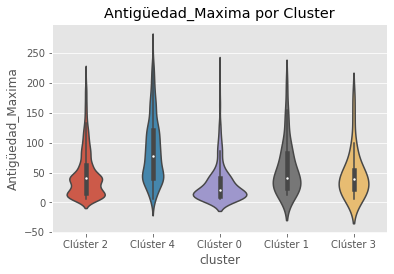

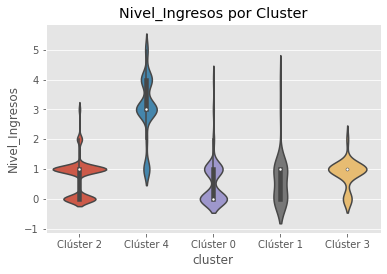

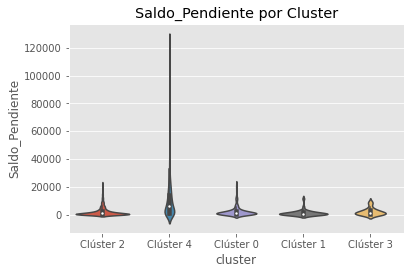

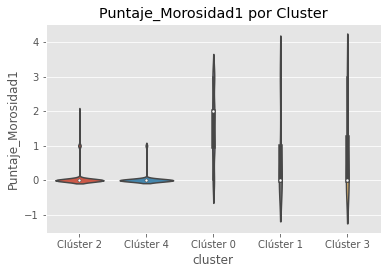

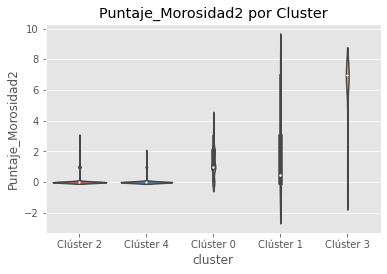

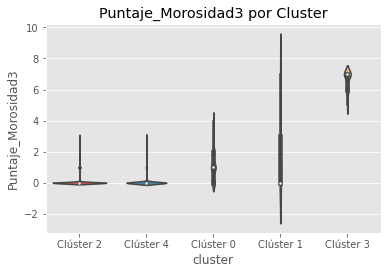

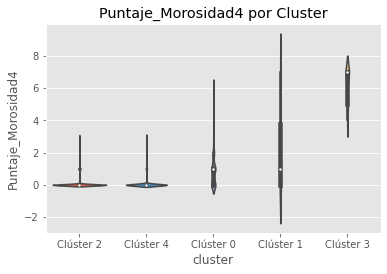

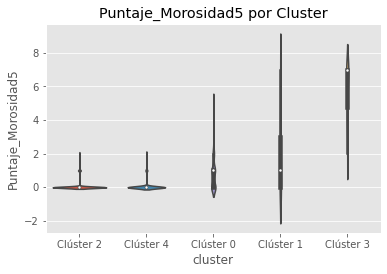

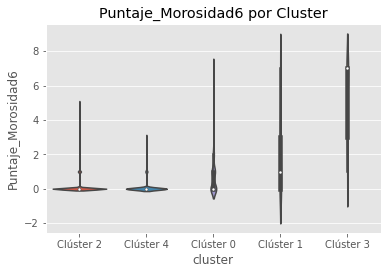

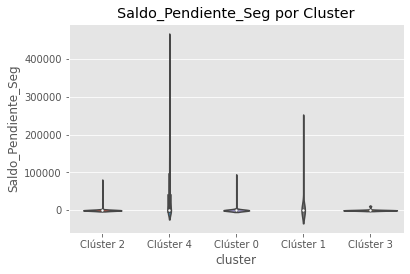

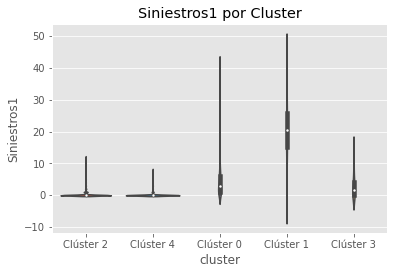

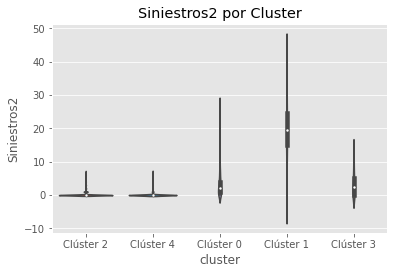

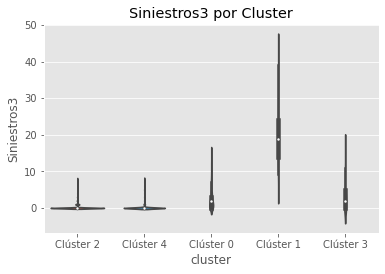

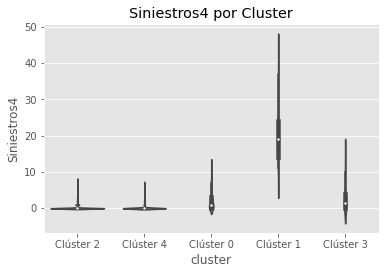

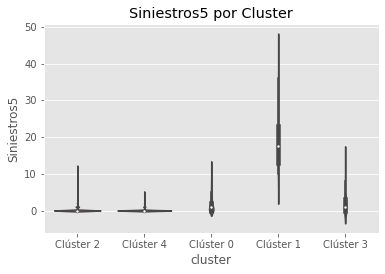

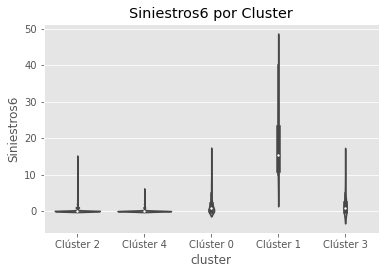

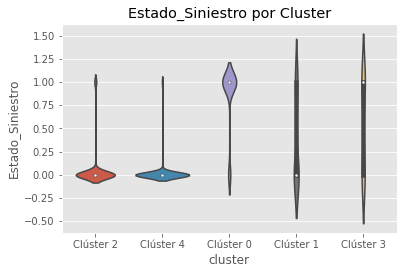

In [34]:
cluster = 'cluster'

for i in columns_num: 
  graficar_nums(cluster, i, data_siniestros_clus)

## Prueba cada par de Clusters

In [35]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 4.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58663 sha256=6e157c7390155e9d0acd2b8cbc1da1a1885c41f5ced845164cd2dc925fcb0679
  Stored in directory: /root/.cache/pip/wheels/81/e6/c8/a378f0c300eba657e42ae0df674e32e6d434d96a7eb765b067
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=87c9c54660092473a728345a66276374ac6187214722148be29e3f907796e6f7
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [36]:
# prueba Tukey cada par de grupos.

from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=data_siniestros_clus, res_var='Estado_Siniestro', xfac_var='cluster', anova_model='Estado_Siniestro ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Clúster 2,Clúster 4,0.032548,0.010203,0.054894,5.621159,0.001000
1,Clúster 2,Clúster 0,0.819181,0.785383,0.852979,93.535607,0.001000
2,Clúster 2,Clúster 1,0.294818,0.198226,0.391410,11.778815,0.001000
3,Clúster 2,Clúster 3,0.488427,0.376062,0.600791,16.774849,0.001000
4,Clúster 4,Clúster 0,0.851730,0.813807,0.889653,86.673438,0.001000
5,Clúster 4,Clúster 1,0.327366,0.229255,0.425477,12.876644,0.001000
6,Clúster 4,Clúster 3,0.520975,0.407302,0.634648,17.686684,0.001000
7,Clúster 0,Clúster 1,0.524364,0.423028,0.625699,19.969193,0.001000
8,Clúster 0,Clúster 3,0.330755,0.214287,0.447222,10.959488,0.001000
9,Clúster 1,Clúster 3,0.193609,0.046122,0.341096,5.065955,0.003171
